is in ipython: 1
alias of mapper 11001010: 202
rulestring of rule 110: 01110110


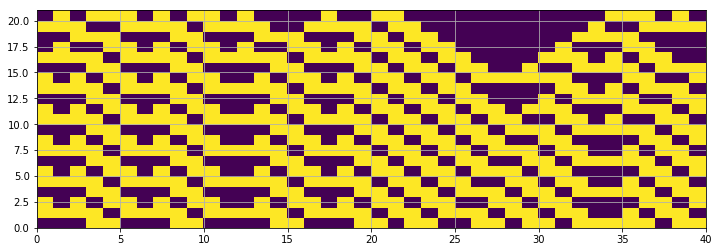

(97, 97)
(21, 1, 40, 40)


In [1]:
from recur import *
import KBs
reload(KBs)
import KBs
from KBs import *


from pymisca.util import *

### To be compiled
def printmat(mat,sep=',',offset=0):
    if isinstance(mat,np.ndarray):
        mat=  mat.tolist()
    printlines([sep.join(str(y) for y in  x) for x in mat])
#     printlines([sep.join(str(y) for y in ('-,')*offset + x) for x in mat])

kb  = kb_eca()
rstr = '11001010'
alias = kb.rulestr2alias(rstr)
print 'alias of mapper %s:'%rstr,alias
print 'rulestring of rule 110:',kb.alias2rulestr('110')

random.seed(0)
np.random.seed(30)
env = CA_sys()
env.family= kb_eca()
env.alias = '110'
env.alias = '118'
env.alias2rulestr()
env.change_size((1,100,40**2))
hist = sample(env,T=20)
# hist.shape
out = np.take(hist,0,axis=-1)
showsptime(out[::-1])
# print out
# showsptime(out)
plt.grid()
plt.show()


    
import scipy.spatial.distance as spdist
# spdist.pdist(np.array(tile0),isCompatible)
# ?spdist.cdist
def f1():
#     X = np.array(tile0)
    X = map(tile_flatten,tile0)
    D = spdist.cdist(X,X,isCompatible)
    print D.shape
    return D


tile0 = par2tiles(env,3,0)
tile1 = par2tiles(env,3,3)

# %time D1 = f1()
# plt.imshow(D1)
# plt.show()

f2 = lambda : tile2adj(map(tile_flatten,tile0))
# %time D2 = tile2adj(map(tile_flatten,tile0))
# plt.imshow(D2)
# plt.show()
assert np.all(f1()==f2()),'Result disagree'

print hist.shape

In [2]:

print env.dimsiz

[128, 128, 1024]


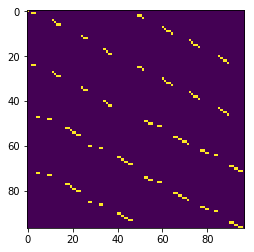

No of all tiles: 47260
[(47191, [18, 35, 25, 49, 52]), (47209, [21, 86, 32, 63, 79]), (47224, [22, 88, 80]), (47257, [70, 93, 46, 89, 83]), (47259, [0])]
Found tiles (len<5): [(47191, [18, 35, 25, 49, 52]), (47209, [21, 86, 32, 63, 79]), (47224, [22, 88, 80]), (47257, [70, 93, 46, 89, 83]), (47259, [0])]
(101, 1, 5, 1)


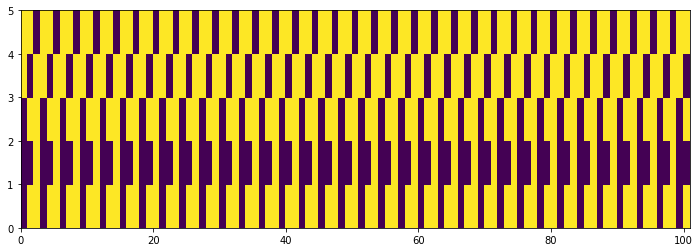

CPU times: user 2.12 s, sys: 384 ms, total: 2.5 s
Wall time: 2.06 s


In [3]:
%%time
####################################################################
#########oooo|oooo|xxx|cccc|oooo####################################
####################################################################
####################################################################
#########oooo|xxxc|ccc|oooo|oooo####################################
####################################################################
## source oooo->xxxx
## sink   cccc->oooo
## find paths from sources to sinks


# main(per=1,T=3)


import simpleCycles
### Look for a period 2 glider, drift 1 on a period 2 backgd
### common product is 6

### find period 2 static tiling
### Decide a background to use

Tbk = 3
tile0 = par2tiles(env,T=Tbk,per=0,n=1)
tile = tile0
curr = pre2curr(tile,mid=1)
# print mat2str(tile_flatten(tile0))
amat = tile2adj(tile0)

# interm = (amat.sum(axis=0))&(amat.sum(axis=1))!=0
# print interm.shape
# amat=  amat[interm,:][:,interm]
# print amat.shape

plt.imshow(amat)
plt.show()

cks = simpleCycles.simple_cycles(adj2dct(amat))
# import networkx as nx
# g = nx.DiGraph(amat)
# cks = nx.simple_cycles(g)
cks = list(cks)
print 'No of all tiles:',len(cks)
cks = filter(lambda (i,x):len(x)<=5,enumerate(cks))
# print len(cks)
print cks[:10]

ck = cks[0]
i,ck = ck
bkd = sum([curr[x] for x in ck],())
print 'Found tiles (len<5):',cks[:10]

show_cycle(env,ck,curr)
plt.show()


In [11]:
ck = cks[2]
i,ck = ck
bkd = sum([curr[x] for x in ck],())


IndexError: list index out of range

In [ ]:
from igraph import Graph

def cut(lst,i):
    if i>=0:
        return lst[:i]
    else:
        return lst[i:]
def cycle_cut(ck,N):
    if N>=0:
        it = itertools.cycle(ck)
    else:
        it = itertools.cycle(ck[::-1])
    out = tuple(next(it) for _ in range(abs(N)))
    if N>=0:
        pass
    else:
        out = out[::-1]
    return out
        
print cycle_cut(bkd,5)
print cycle_cut(bkd,-5)

def tile_filter(tile,L,bkgd):
#     L = -(Tb + (1-spper)*Lb)
#     query = iter_head(itertools.cycle(bkd),-L)
    query = cycle_cut(bkgd,-L)
    tile = filter(lambda seq: tuple(cut(seq[2:],L))== query,
                 tile)
    assert len(tile)!=0, 'tile is empty'
    amat = tile2adj(tile)
    print amat.shape
    tile = np.array(tile)[amat.any(axis= int(L<0))]
    return tile
#     tile0Right = np.array(tile)[amat.any(axis=1)]
#     tileRight = tile0Right

def pre2curr(pre,mid=0,env=None):
    if isinstance(pre[0],dict):
        pre = map(tile_flatten,pre)
    if env is None:
        out = []    
        for x in pre:
    #         T = x[]
            T,per = x[:2]
            move = 0 if (per==0) | mid else  cmp(per,0)*(T//abs(per))
            out.append(x[2+T+move:-T+move])
    else:
        #### To be modified
        out = []    
        for x in pre:
            T,per = x[:2]
            ini = np.reshape(x[2:],(1,-1,1))
            y = sample(env,T=T,ini=ini)[-1].ravel()[T:-T]
            out.append(y)
    return out



##### Taken from https://stackoverflow.com/a/147539/8083313
def gcd(a, b):
    """Return greatest common divisor using Euclid's Algorithm."""
    while b:      
        a, b = b, a % b
    return a

def lcm(a, b):
    """Return lowest common multiple."""
    return a * b // gcd(a, b)

def lcmm(*args):
    """Return lcm of args."""   
    return reduce(lcm, args)



In [57]:

Tb = lcm(abs(per),Tbk)
Tb

2

In [5]:
# %%time
# Tbk = ?
per = 2
Tb = lcm(abs(per),Tbk)
drift = Tb//per
# Lb = len(bkd)
Lb = lcm(abs(drift),len(bkd))
assert Lb <= 5
assert Tb <=10
print Tb
print drift
print Lb

spper = Tb//per/Lb
assert isinstance(spper,int)
tile = tile_flatten(par2tiles(env,n=Lb,T=Tb,per=per))
# tile = [x for x,_ in filter(lambda (x,y): tuple(x[2+Tb:-Tb])!=tuple(y),zip(tile,pre2curr(tile)))]
assert tile
tileG = tile

tile0 = main(env,glider=bkd,T=Tb,per=0,findall=1)
curr = pre2curr(tile0)
tile0 = tile_flatten(tile0)


### Construct Right tile

L = -(Tb + (1-spper)*Lb)
print L
tileRight = tile_filter(tile0,L,bkd)

### Construct Left tile
L = Tb + (1+spper)* Lb
print L
tileLeft = tile_filter(tile0,L,bkd)




print len(tile0)
print len(tileLeft)
print len(tileRight)
print len(tileG)


msg = '''
### Finding paths on the Graph
'''
print msg

tile = sum([ x.tolist() if not isinstance(x,list) else x  for x in 
            [tileLeft,tileRight,tileG]] ,
          [])
curr = pre2curr(tile,mid=0,env=env)

T = Tb
heads  = [x[2:2+2*T] for x in tile]
tails  = [x[-2*T:] for x in tile]
amat = np.array(tails)[:,None] == np.array(heads)[None,:]
print amat.shape
amat = np.all( amat,axis=-1)
g = Graph.Adjacency(amat.tolist())


# find_all_paths(g,0,1)
tLidx = range(len(tileLeft))
tRidx = range(len(tileLeft),len(tileLeft)+len(tileRight))
lst = []
res = map(lambda L: g.get_shortest_paths(L,tRidx),tLidx)

out = sum(res,[])
out = [x for x in out if x]
print out[:10]
print 'Number of paths:',len(out)

8
1
1
-8
(512, 512)
10
(128, 128)
131072
128
512
65536

### Finding paths on the Graph



/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


AttributeError: 'bool' object has no attribute 'shape'

In [ ]:


per = [x[1] for x in tile]
per_gb =  [sum(per[i] for i in x) for x in out]

print per_gb
# i = 82
# i = 0
lst = np.where(np.array(per_gb)>0)[0]
print 'Nonzero drift:',lst

import sys

def show(i,verbose=0):
    print i
    ck = out[i]
    ck = ck[0:1]*2 + ck + ck[-1:]*2
    if verbose:
        for i,x in enumerate(ck):
            print '%s\t'%x,
            sys.stdout.write('-,'*i*Lb)
#             print('-,'*i)
            print mat2str([tile[x][2:]],sep=',')
        print ck 
        print [curr[x] for x in ck]
    show_cycle( env,ck,curr)
# print per_gb
# print np.where(np.array(per_gb)==0)[0]
    plt.show()
# out[0]

0
0	0,0,0,0,0,0,0,0,0,0,0
0	-,0,0,0,0,0,0,0,0,0,0,0
0	-,-,0,0,0,0,0,0,0,0,0,0,0
3	-,-,-,0,0,0,0,0,0,0,0,0,0,0
3	-,-,-,-,0,0,0,0,0,0,0,0,0,0,0
3	-,-,-,-,-,0,0,0,0,0,0,0,0,0,0,0
[0, 0, 0, 3, 3, 3]
[array([0]), array([0]), array([0]), array([0]), array([0]), array([0])]
(101, 1, 6, 1)


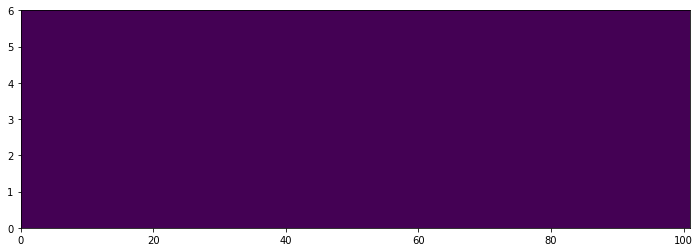

In [43]:
show(0,verbose=1)

In [13]:
map(show,lst[:3])

[]

In [ ]:
##### Old implementation
# L = -(Tb + (1-spper)*Lb)
# L = -L
# # query = iter_head(itertools.cycle(bkd),L)
# query = cycle_cut(bkd,L)
# # print Tb,Lb
# tile = filter(lambda seq: tuple(seq[-(L):])== tuple(query),tile0)
# assert tile
# amat = tile2adj(tile)
# tile0Right = np.array(tile)[amat.any(axis=1)]
# tileRight = tile0Right

# L = Tb + (1+spper)* Lb
# # query = iter_head(itertools.cycle(bkd[::-1]),L)[::-1]
# query = cycle_cut(bkd,-L)
# tile = filter(lambda seq: tuple(seq[2:2+L])== tuple(query),tile0)
# assert tile
# amat = tile2adj(tile)
# tileLeft = np.array(tile)[amat.any(axis=0)]
